<a href="https://colab.research.google.com/github/wesmith4/mat210/blob/main/hw6/problem3-4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Problem 3

In [2]:
# Transition matrix
A = np.array([[.15,0,0,0],[.60,.15,0,0],[0,.8,1,0],[.25,.05,0,1]])
A

array([[0.15, 0.  , 0.  , 0.  ],
       [0.6 , 0.15, 0.  , 0.  ],
       [0.  , 0.8 , 1.  , 0.  ],
       [0.25, 0.05, 0.  , 1.  ]])

## Probability that a freshman will graduate

In [3]:
# Set initial state
v0 = np.array([[1],[0],[0],[0]])

# print(np.linalg.matrix_power(A,10)@v0)
# print(np.linalg.matrix_power(A,50)@v0)
print(np.linalg.matrix_power(A,400)@v0)

[[0.        ]
 [0.        ]
 [0.66435986]
 [0.33564014]]


## Probability that a sophomore will graduate

In [4]:
v0 = np.array([[0],[1],[0],[0]])

print(np.linalg.matrix_power(A,400)@v0)

[[0.        ]
 [0.        ]
 [0.94117647]
 [0.05882353]]


# Problem 4

In [5]:
beta = 1
L = np.array([[.15,beta*.80,0,0],[.60,.15,0,0],[0,.80,1,0],[.25,.05,0,1]])
L

array([[0.15, 0.8 , 0.  , 0.  ],
       [0.6 , 0.15, 0.  , 0.  ],
       [0.  , 0.8 , 1.  , 0.  ],
       [0.25, 0.05, 0.  , 1.  ]])

In [6]:
v0 = np.array([[1000],[1000],[0],[0]])

In [7]:
data = np.zeros((10,4))
for n in range(10):
    vn = np.linalg.matrix_power(L,n)@v0
    data[n] = vn.reshape((1,4))
    
populations = data[:,0:2]
populations = pd.DataFrame(populations)
populations['Total'] = np.sum(populations,axis=1)
populations = populations.rename(columns={0: 'Freshmen', 1: 'Sophomores'})
populations

,Freshmen,Sophomores,Total
0,1000.000000,1000.000000,2000.000000
1,950.000000,750.000000,1700.000000
2,742.500000,682.500000,1425.000000
3,657.375000,547.875000,1205.250000
4,536.906250,476.606250,1013.512500
5,461.820937,393.634687,855.455625
6,384.180891,336.137766,720.318656
7,326.537346,280.929199,607.466545
8,273.723961,238.061788,511.785749
9,231.508024,199.943645,431.451669


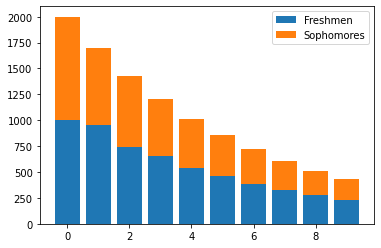

In [23]:
fig,ax = plt.subplots()

ax.bar(populations.index,populations['Freshmen'],label='Freshmen')
ax.bar(populations.index,populations['Sophomores'],bottom=populations['Freshmen'],label='Sophomores')
ax.legend()
plt.show()